<h4>Hecho Por:

      -  Santiago Fernández Seoane

      -  Alejandro Regueiro Ruiz

      -  Pablo López Martínez

      -  Adriana Rodríguez Rey
</h4>



<h3 style="text-align: center">K-Neares Neighbors a partir de dataset de Telefonía</h3>

<p>Importación de las librerías:</p>

- Las primeras librerías son las fundamentales para el cálculo, visualización, manipulación y análisis de datos.
- La librería *sklearn* es clave para el aprendizaje automático. Incluimos submódulos que nos permiten usar:
    * El módulo vecinos con el knn. 
    * Métricas de evaluación.
    * División de datos en conjunto de entrenamiento y prueba.
    * Regresión lineal con regularización.
- *seaborn* es utilizada para la visualización con gráficos.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import kagglehub


c:\Users\santiago.fernandezse\AppData\Local\miniconda3\envs\pia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Si tenemos el dataset descargado lo ejecutaremos con la primera celda, de lo contrario usamos el import de kaggle para descargarlo directamente

In [2]:
# Descargamos el dataset
#path = kagglehub.dataset_download("blastchar/telco-customer-churn")

#print("Path to dataset files:", path)

path = "dataset/"

Path to dataset files: C:\Users\santiago.fernandezse\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


### Leemos el dataset

In [3]:
dfTelco = pd.read_csv(path+'WA_Fn-UseC_-Telco-Customer-Churn.csv')
dfTelco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Miramos los tipos de datos y la cantidad de datos con las que trabajaremos

In [4]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Definiciones de Variables

- **Dependents**: Indica si el cliente tiene dependientes (Sí, No).
- **Tenure**: Número de meses que el cliente ha permanecido con la empresa.
- **PhoneService**: Indica si el cliente tiene servicio de telefonía (Sí, No).
- **MultipleLines**: Indica si el cliente tiene múltiples líneas telefónicas (Sí, No, No tiene servicio telefónico).
- **InternetService**: Proveedor de servicio de internet del cliente (DSL, Fibra óptica, No tiene).
- **OnlineSecurity**: Indica si el cliente tiene seguridad en línea (Sí, No, No tiene servicio de internet).
- **OnlineBackup**: Indica si el cliente tiene copia de seguridad en línea (Sí, No, No tiene servicio de internet).
- **DeviceProtection**: Indica si el cliente tiene protección para dispositivos (Sí, No, No tiene servicio de internet).
- **TechSupport**: Indica si el cliente tiene soporte técnico (Sí, No, No tiene servicio de internet).
- **StreamingTV**: Indica si el cliente tiene servicio de TV en streaming (Sí, No, No tiene servicio de internet).
- **StreamingMovies**: Indica si el cliente tiene servicio de películas en streaming (Sí, No, No tiene servicio de internet).
- **Contract**: Término del contrato del cliente (Mes a mes, Un año, Dos años).
- **PaperlessBilling**: Indica si el cliente tiene facturación sin papel (Sí, No).
- **PaymentMethod**: Método de pago del cliente (Cheque electrónico, Cheque por correo, Transferencia bancaria automática, Tarjeta de crédito automática).
- **MonthlyCharges**: Monto cobrado al cliente mensualmente.
- **TotalCharges**: Monto total cobrado al cliente.
- **Churn**: Indica si el cliente ha cancelado el servicio (Sí, No).

Convertimos todas las categorigal features a LabelEncoder y pasamos TotalCharges a valor numerico, para poder crear un mapa de calor y ver las relaciones.

A continuación eliminaremos la columna de CustomerID, ya que no nos aporta ningun dato relevante, seguido de esta columna eliminaremos las filas de los valores NaN en la columna TotalCharges.

No pasamos los datos (TotalCharges y MonthlyCharges) de tipo object a numeric ya que empeora la precisión

In [5]:
categorical_features = [
    'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'gender',
    'Partner', 'Dependents','PhoneService', 'PaperlessBilling', 'Churn'
]

# Vamos a eliminar la columna de ID, porque no es necesario para nuestro algoritmo

# Vamos a convertir las todas las columnas tipo object con label encoder

le = LabelEncoder()
for col in categorical_features:
    if dfTelco[col].dtype == 'object':
        dfTelco[col] = le.fit_transform(dfTelco[col])

dfTelco['TotalCharges'] = pd.to_numeric(dfTelco['TotalCharges'], errors='coerce')

dfTelco.drop('customerID', axis=1, inplace=True)

dfTelco.dropna(subset="TotalCharges",inplace=True)


Mostramos con un info las columnas que hemos convertido con labelEnconder

In [23]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

Mostramos el dataframe para ver de forma visual como los datos están en binario

In [6]:
dfTelco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


Generamos un **mapa de calor (heatmap)** que muestra la correlación entre las variables.

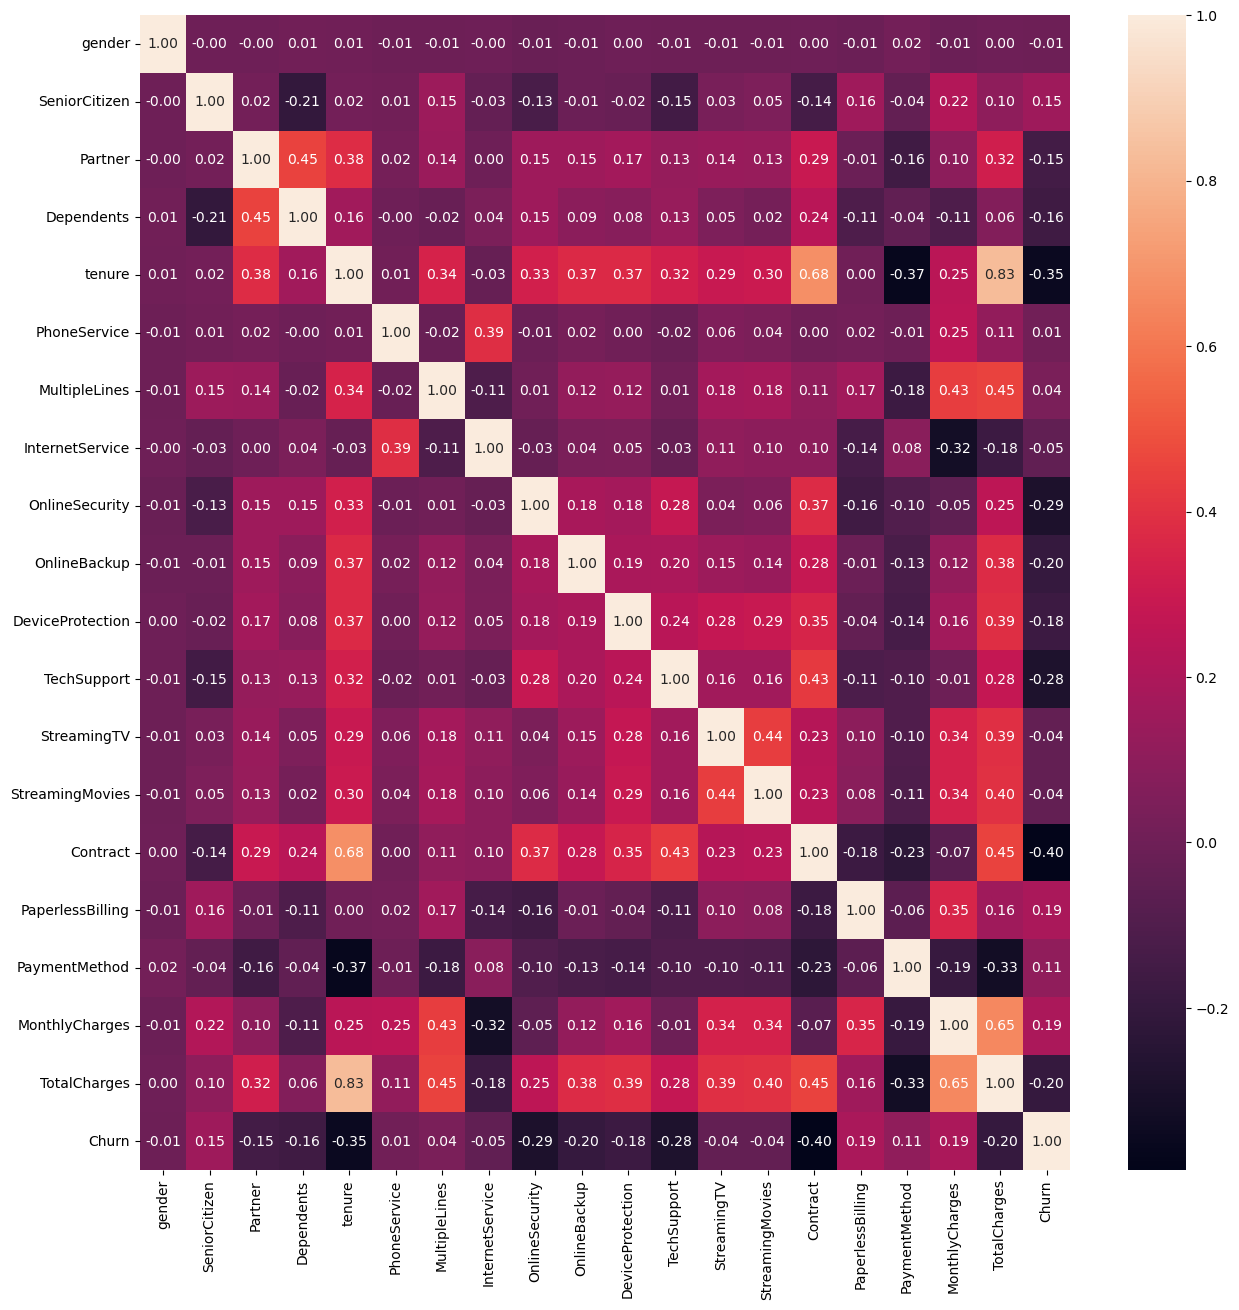

In [7]:
# Creamos un mapa de calor para comprobar las relaciones entre las columnas de nuestro dataframe, la columna con la que vamos a trabajar es Churn

corr = dfTelco.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


Definimos *x* (características).  
Definimos *y* (etiquetas).  
  
Dividimos los datos de entrenamiento (90%) y prueba (10%).

In [8]:
# Vamos a entrar un modelo de ia basade en el algoritmo de knn
# Vamos a usar los campos de seniorcitizen, tenure, onlinebackup, techsupport, contract, paperlessbilling, monthlycharges, totalcharges

X = dfTelco[['SeniorCitizen', 'Partner', 'tenure', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
y = dfTelco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

Hacemos la gráfica para ver la función Sigmoide de la Regresión Logística, como podemos ver es que tenemos una funcion sigmoide inversa no muy marcada.

Hemos probado con todas las demas columnas según su correlación y hemos notado que no cambiaba absolutamente nada.

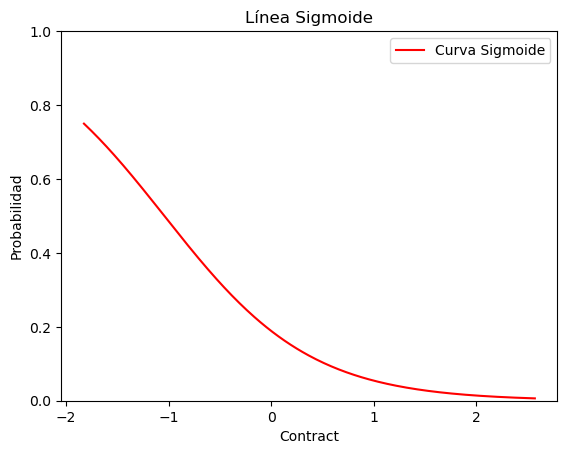

In [9]:
def plot_sigmoid_line(df, feature_col, target_col):
    # Extraer características y variable objetivo
    X = df[feature_col].values.reshape(-1, 1)
    y = df[target_col].values

    # Normalizar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Crear una instancia del clasificador de regresión logística y ajustar los datos
    clf = LogisticRegression()
    clf.fit(X_scaled, y)

    # Crear una malla para el gráfico
    x_min, x_max = X_scaled.min() - 1, X_scaled.max() + 1
    xx = np.linspace(x_min, x_max, 300).reshape(-1, 1)

    # Predecir las probabilidades en la malla
    Z = clf.predict_proba(xx)[:, 1]

    # Graficar la línea sigmoide
    plt.figure()
    plt.plot(xx, Z, color='red', label='Curva Sigmoide')
    plt.xlabel(feature_col)
    plt.ylabel('Probabilidad')
    plt.title("Línea Sigmoide")
    plt.legend()
    plt.ylim(0, 1)  # Asegurar que el eje y vaya de 0 a 1
    plt.show()

# Uso de la función con tu dataset
plot_sigmoid_line(dfTelco, 'Contract','Churn')


# Descripción de los Parámetros en `param_grid`

- **`n_neighbors`**: 
  - Rango: `range(1, 50)`
  - Descripción: Especifica el número de vecinos a considerar para la clasificación o regresión. El rango de 1 a 50 indica que se probarán diferentes valores dentro de este rango para encontrar el número óptimo de vecinos.

- **`weights`**: 
  - Valores: `['uniform', 'distance']`
  - Descripción: Determina cómo se ponderan los votos de los vecinos:
    - `'uniform'`: Todos los vecinos tienen el mismo peso.
    - `'distance'`: Los vecinos más cercanos tienen un mayor peso en la decisión que los vecinos más lejanos.

- **`algorithm`**: 
  - Valores: `['auto']`
  - Descripción: Selecciona el algoritmo utilizado para computar los vecinos más cercanos. Con `'auto'`, el algoritmo selecciona automáticamente el método más apropiado basado en los valores de los otros parámetros y las características del conjunto de datos.

- **`p`**: 
  - Valores: `[1, 2]`
  - Descripción: Define la métrica de distancia a utilizar:
    - `1`: Utiliza la distancia de Manhattan (L1).
    - `2`: Utiliza la distancia Euclidiana (L2).

In [10]:
param_grid = {
    'n_neighbors': range(1, 100),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

Buscamos la mejor solución para nuestro knn probando los parámetros setteados y usaremos la configuración para cuando ejecutemos el algoritmo

# Descripción de los Parámetros en `GridSearchCV`

- **`estimator`**: 
  - Valor: `KNeighborsClassifier()`
  - Descripción: El modelo de estimador que se va a ajustar. En este caso, es el clasificador K-Nearest Neighbors (KNN).

- **`param_grid`**: 
  - Valor: `param_grid`
  - Descripción: Un diccionario con los parámetros a probar durante la búsqueda en cuadrícula. Cada clave es el nombre de un parámetro y cada valor es una lista de valores a probar para ese parámetro.

- **`cv`**: 
  - Valor: `5`
  - Descripción: El número de divisiones para la validación cruzada. En este caso, se utiliza una validación cruzada de 5 pliegues (5-fold cross-validation). Esto significa que el conjunto de datos se divide en 5 partes, y el modelo se entrena y evalúa 5 veces, utilizando una parte diferente como conjunto de prueba cada vez y las otras 4 partes como conjunto de entrenamiento.

- **`scoring`**: 
  - Valor: `'accuracy'`
  - Descripción: La métrica utilizada para evaluar el rendimiento del modelo. En este caso, se utiliza la precisión (accuracy) como métrica de evaluación. La precisión es la proporción de predicciones correctas sobre el total de predicciones.

In [11]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

best_params_grid = grid_search.best_params_
print(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")


Mejores hiperparámetros (GridSearchCV): {'algorithm': 'auto', 'n_neighbors': 73, 'p': 1, 'weights': 'distance'}


Probamos a usar el RandomizedSearch sobre el param_grid y veremos los valores que nos da, veremos la diferencia junto al grid search

In [12]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
random_search.score(X_test, y_test)

# Obtener los mejores hiperparámetros de RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (RandomizedSearchCV): {best_params_random}")

Mejores hiperparámetros (RandomizedSearchCV): {'weights': 'distance', 'p': 1, 'n_neighbors': 31, 'algorithm': 'auto'}


Ejecutamos el modelo KNN con los parametros recogidos del gridSearch y calcularemos la precisión

In [13]:
knn = KNeighborsClassifier(
    n_neighbors=best_params_grid['n_neighbors'],
    weights=best_params_grid['weights'],
    algorithm=best_params_grid['algorithm'],
    p=best_params_grid['p']
).fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7741477272727273


Predecimos con los datos de X_test en el KNN

In [14]:
#utilizo los datos que ya tenía para pruebas
y_pred = knn.predict(X_test)

#podemos también usar predict_proba para tener las probabilidades de clase
probabilidades = knn.predict_proba(X_test)
print(probabilidades[:10]) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Error Cuadrático Medio:", mse)
print ("Raíz del Error Cuadrático Medio:", rmse)
print ("Coeficiente de determinación R2:", r2)

[[1.         0.        ]
 [0.99081235 0.00918765]
 [0.91598135 0.08401865]
 [0.65432458 0.34567542]
 [0.9569307  0.0430693 ]
 [0.5800007  0.4199993 ]
 [0.88835653 0.11164347]
 [0.55034019 0.44965981]
 [0.93986728 0.06013272]
 [0.67438871 0.32561129]]
Error Cuadrático Medio: 0.22585227272727273
Raíz del Error Cuadrático Medio: 0.47523917423469286
Coeficiente de determinación R2: -0.15781089998862208


Comparamos la diferencia entre los valores reales y nuestra predicción

In [15]:
df = pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})
df

,Real,Prediccion
2713,0,0
1613,0,0
2090,0,0
5787,1,0
6596,0,0
...,...,...
2467,0,0
5477,0,0
1567,0,0
3328,0,1


Creamos un rango de valores para el número de vecinos (neighbors) y calculamos la precisión (accuracy) del modelo KNN para cada valor de vecino. Almacenamos las precisiones en los diccionarios train_accuracies y test_accuracies respectivamente.

In [16]:
# Crear vecinos
neighbors = np.arange(1,60)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59] 
 {np.int64(1): 0.995575221238938, np.int64(2): 0.8699431099873578, np.int64(3): 0.8699431099873578, np.int64(4): 0.8402338811630847, np.int64(5): 0.8400758533501896, np.int64(6): 0.8283817951959545, np.int64(7): 0.827433628318584, np.int64(8): 0.8230088495575221, np.int64(9): 0.8214285714285714, np.int64(10): 0.8170037926675094, np.int64(11): 0.8151074589127687, np.int64(12): 0.8146333754740834, np.int64(13): 0.8140012642225032, np.int64(14): 0.8116308470290771, np.int64(15): 0.8116308470290771, np.int64(16): 0.8116308470290771, np.int64(17): 0.8119469026548672, np.int64(18): 0.8108407079646017, np.int64(19): 0.8095764854614412, np.int64(20): 0.809260429835651, np.int64(21): 0.8094184576485461, np.int64(22): 0.8086283185840708, np.int64(23): 0.8102085967130215, np.int64(24): 0.8084702907711757, np.int64(25)

Creamos un gráfico que muestra lo que varía el nº de vecinos con respecto a nuestra predicción.

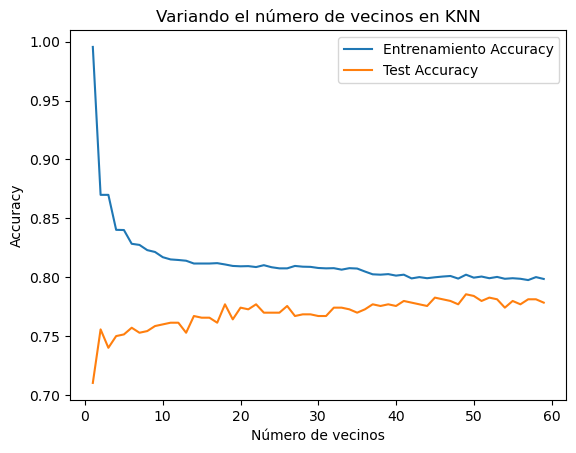

In [17]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Creamos y mostramos la matriz de confusión para mostrar el resultado del modelo

In [19]:
cm = confusion_matrix(y_test, y_pred)

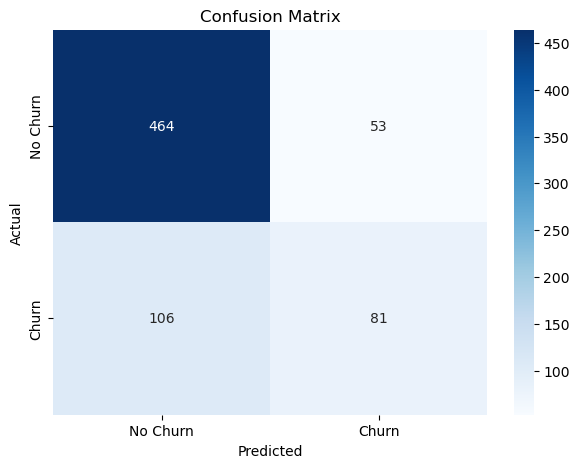

In [20]:
# Create a confusion matrix from the variable cm to calculate the number of correct and incorrect predictions between Churn 0 or 1, i.e., whether the customer left the company or not
# Add below the number if it is TP, FP, TN, FN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Creamos una gráfica de clasificación de clases que compara los resultados reales con nuestra predicción

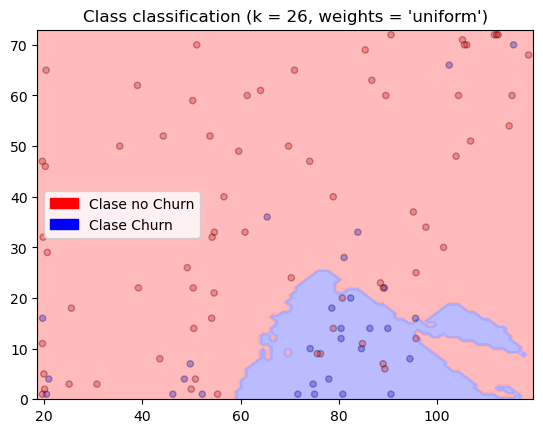

In [21]:
# Seleccionar dos características para la visualización
X_vis = dfTelco[['MonthlyCharges', 'tenure']].values
y = dfTelco['Churn'].values  # Asegúrate de que y sea una serie o array

sample_size = 100  # Número de puntos a mostrar
if len(X_vis) > sample_size:
    indices = np.random.choice(len(X_vis), sample_size, replace=False)
    X_vis = X_vis[indices]
    y = y[indices]

# Parámetros del clasificador
n_neighbors = 26
weights = 'uniform'

# Crear una instancia del clasificador y ajustar los datos
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, )
clf.fit(X_vis, y)

# Crear color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Graficar el resultado usando DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_vis,
    response_method="predict",
    cmap=cmap_light,
    alpha=0.8
)

# Graficar también los puntos de entrenamiento
disp.ax_.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20, alpha=0.3)
disp.ax_.set_xlim(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1)  # Ajustar el rango del eje x
disp.ax_.set_ylim(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1)  # Ajustar el rango del eje y

# Crear leyenda
unique_classes = np.unique(y)
class_labels = ['Clase no Churn' if cls == 0.0 else 'Clase Churn' for cls in unique_classes]
patches = [mpatches.Patch(color=cmap_bold(i), label=label) for i, label in enumerate(class_labels)]
disp.ax_.legend(handles=patches)

# Título del gráfico
disp.ax_.set_title("Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

# Mostrar el gráfico
plt.show()


Realizamos las predicciones con el conjunto de prueba (probabilidades) para ROC para comprobar la tasa de falsos positivos (TFP)

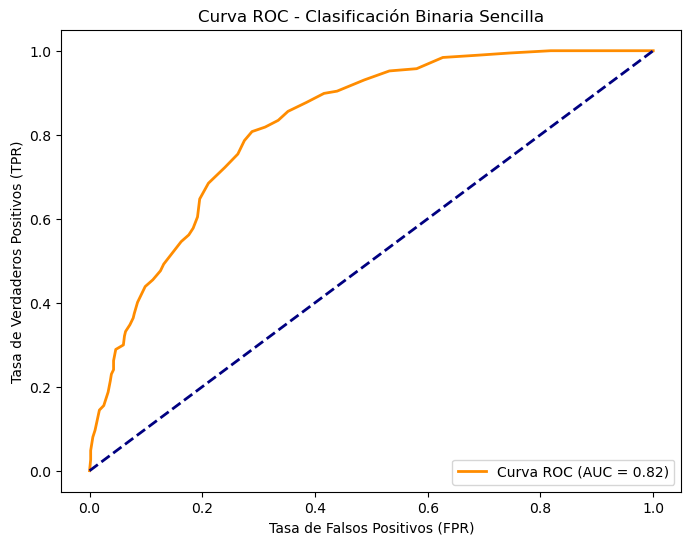

AUC: 0.82


In [22]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria Sencilla')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')